# Logistic Regression Model (Titanic dataset)

Motivation: Using logistic regression to solve a classification problem (none other than the famous Titanic dataset) to predict survival OR death and interpret the results using a confusion matrix.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Step 1: Performing EDA

Motivations for EDA
- Detection of mistakes
- Checking of assumptions
- Preliminary selection of appropriate models
- Determining relationships among the explanatory variables
- Assessing the direction and rough size of relationships between explanatory and outcome variables

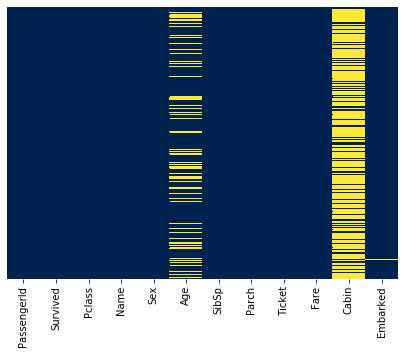

In [7]:
#Checking for null values

plt.figure(figsize=(7,5))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='cividis')
#we can see plenty of null values for "Age" and "Cabin"
#we can also see a little null values for Embarked as well

In [8]:
train[train['Embarked'].isnull()]
#pessengerID 62 and 830 do not have Embarked data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


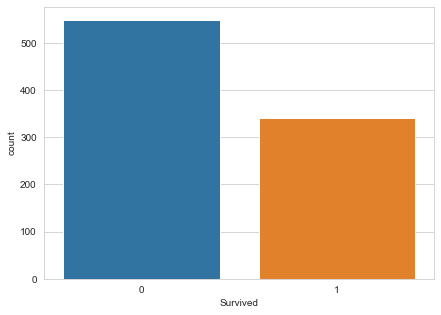

In [10]:
#How many survived/dead?

plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.countplot('Survived',data=train)

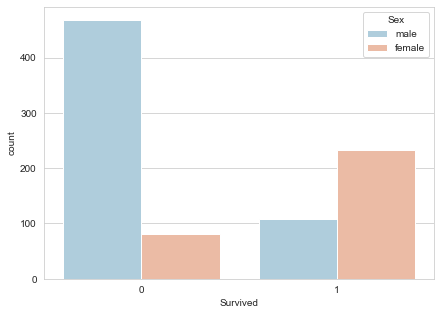

In [12]:
#How many survived/dead by sex?

plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.countplot('Survived',hue='Sex',data=train,palette='RdBu_r')

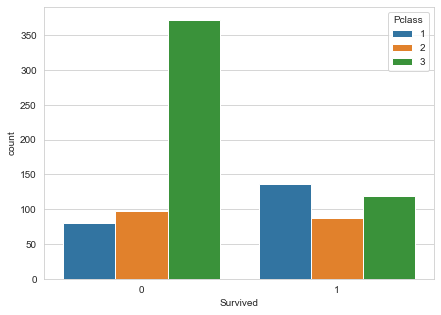

In [13]:
#How many survived/dead by Pclass?

plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.countplot('Survived',hue='Pclass',data=train)

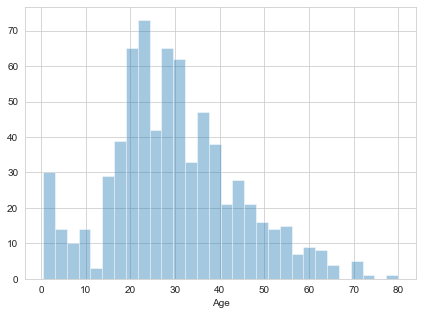

In [15]:
#Distribution by age

plt.figure(figsize=(7,5))
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

# Step 2a: Data Cleaning - To handle missing values

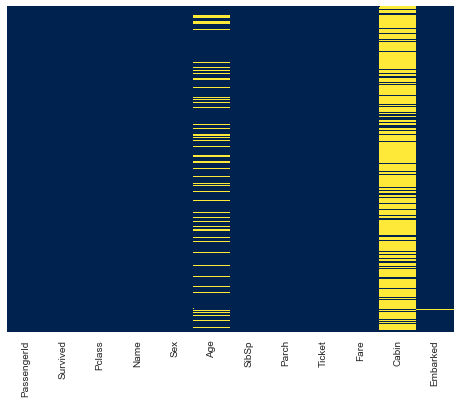

In [16]:
#Checking for null values

plt.figure(figsize=(8,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='cividis')
#we can see plenty of null values for "Age" and "Cabin"
#we can also see a little null values for Embarked as well

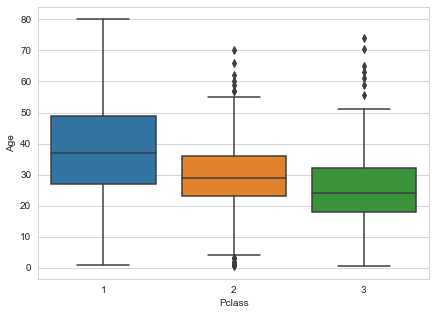

In [17]:
#Handling the missing age via imputation method by taking average age (in the same Pclass) and fill into the missing gaps

#wealthier passengers tend to be older

plt.figure(figsize=(7,5))
sns.boxplot(x='Pclass',y='Age',data=train)

In [20]:
df3 = train['Pclass']==3
dfpclass3 = train[df3]
dfpclass3.describe() #pclass 3 mean age = 24

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,491.000000,491.000000,491.0,355.000000,491.000000,491.000000,491.000000
mean,439.154786,0.242363,3.0,25.140620,0.615071,0.393075,13.675550
std,264.441453,0.428949,0.0,12.495398,1.374883,0.888861,11.778142
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,3.0,18.000000,0.000000,0.000000,7.750000
50%,432.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000
75%,666.500000,0.000000,3.0,32.000000,1.000000,0.000000,15.500000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


In [21]:
#creating a method to deal with missing Age

#df1 = train['Pclass']==1
#dfpclass1 = train[df1]
#dfpclass1.describe() #pclass 1 median age = 37

#df2 = train['Pclass']==2
#dfpclass2 = train[df2]
#dfpclass2.describe() #pclass 2 mean age = 29

#df3 = train['Pclass']==3
#dfpclass3 = train[df3]
#dfpclass3.describe() #pclass 3 mean age = 24

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else: 
            return 24
    else:
        return Age

In [22]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

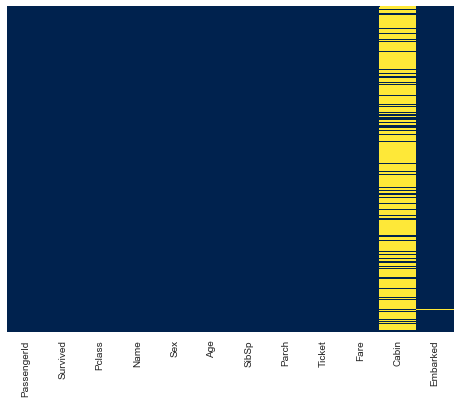

In [23]:
#Age feature no longer has missing data

plt.figure(figsize=(8,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='cividis')

In [30]:
train[train['Cabin'].isnull()].count

<bound method DataFrame.count of      PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

      

In [31]:
#too many missing data for Cabin feature, hence we will drop
train.drop('Cabin',axis=1,inplace=True)

In [32]:
#lastly, we still have one/two records of missing data for Embarked feature. We will drop them. 
train.dropna(inplace=True)

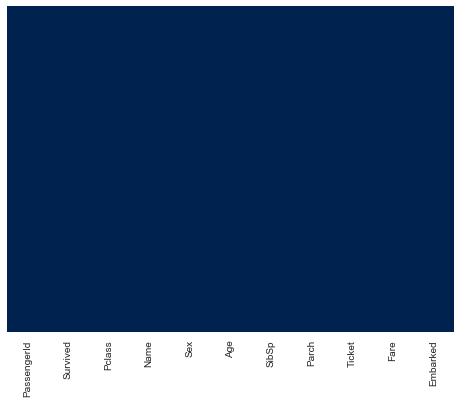

In [33]:
#eventually, we have no more missing data now

plt.figure(figsize=(8,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='cividis')

# Step 2a: Data Cleaning - To Create Dummy Variables

Motivation: To turn nominal data into categorical form

In [35]:
#creating dummy variable
pd.get_dummies(train['Sex']) #return two cols of Female, Male 0 or 1

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [36]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
#we will drop 1 col. To avoid multi colleanearity, as one col can directly predict the other

In [37]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [38]:
embark = pd.get_dummies(train['Embarked'],drop_first=True) #we will drop 1 col. 

In [39]:
pssengerClass = pd.get_dummies(train['Pclass'],drop_first=True) #we will drop 1 col. 

In [40]:
train = pd.concat([train,sex,embark,pssengerClass],axis=1)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [42]:
#we can now drop sex, embarked, ticket, name, Pclass
train.drop(['Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)

In [43]:
train.head() #now all data are numerical now

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [44]:
train.drop('PassengerId',axis=1,inplace=True) #further drop PassengerId as it's just a index that starts from 1. not useful. 

In [45]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Step 3 - To Create the Logistic Regression Model

In [46]:
X = train[['Age','SibSp','Parch','Fare','male','Q','S',2,3]]
y = train['Survived']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression()

In [50]:
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictions = logmodel.predict(X_test)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       169
           1       0.78      0.67      0.72        98

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
cm = confusion_matrix(y_test,predictions)
cm

array([[150,  19],
       [ 32,  66]])

Bonus: To display confusion matrix in a prettier manner

In [57]:
#Metrics for Binary Confusion Matrices
accuracy  = np.trace(cm) / float(np.sum(cm))
precision = cm[1,1] / sum(cm[:,1])
recall    = cm[1,1] / sum(cm[1,:])
f1_score  = 2*precision*recall / (precision + recall)
stats_text = '\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}'.format(accuracy,precision,recall,f1_score)

Text(0.5, 25.0, 'Predicted label\n\nAccuracy=0.809\nPrecision=0.776\nRecall=0.673\nF1 Score=0.721')

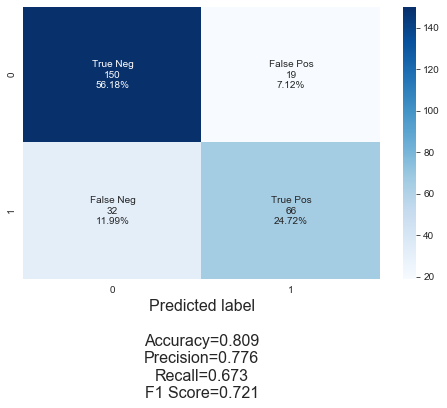

In [67]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted label' + stats_text, fontsize=16)

#sns.heatmap(cm, annot=True)

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       169
           1       0.78      0.67      0.72        98

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



In [68]:
print(confusion_matrix(y_test,predictions))

[[150  19]
 [ 32  66]]
